# 1.Is your nearest neighbor close to you in high-dimensional space?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from keras.datasets import fashion_mnist
from sklearn.utils import shuffle

In [ ]:
def random_points(num_points, num_dimensions):
    normalDisturNum = np.random.randn(num_points, num_dimensions)
    return normalDisturNum

In [ ]:
def average_distance_sp(points,selected_point):
    total_distance = 0.0
    num_points = len(points)

    for point in points:
        distance = np.sqrt(np.sum((point - selected_point)**2))
        total_distance += distance

    average_distance = total_distance / num_points
    return average_distance

In [ ]:
def minimum_distance_sp(points, selected_point):
    minimum_distance = np.sqrt(np.sum((points[0]-selected_point)**2))

    for point in points:
        distance = np.sqrt(np.sum((point-selected_point)**2))
        if(distance < minimum_distance):
            minimum_distance = distance
    return minimum_distance

In [ ]:
def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist / avg_dist

In [ ]:
def experiment(num_dimensions_range, num_points=1000, num_samples=100):
    results_mean = np.zeros((len(num_dimensions_range), 3))
    results_std = np.zeros((len(num_dimensions_range), 3))

    idx = 0
    while idx < len(num_dimensions_range):
        num_dimensions = num_dimensions_range[idx]

        avg_distances = np.zeros(num_samples)
        min_distances = np.zeros(num_samples)
        closest_to_avg_ratios = np.zeros(num_samples)

        i = 0
        while i < num_samples:
            points = random_points(num_points, num_dimensions)
            selected_point = points[np.random.randint(num_points)]

            avg_dist = average_distance_sp(points, selected_point)
            min_dist = minimum_distance_sp(points, selected_point)
            closest_to_avg_ratio_val = closest_to_average_ratio(min_dist, avg_dist)

            avg_distances[i] = avg_dist
            min_distances[i] = min_dist
            closest_to_avg_ratios[i] = closest_to_avg_ratio_val

            i += 1

        results_mean[idx] = np.mean(avg_distances), np.mean(min_distances), np.mean(closest_to_avg_ratios)
        results_std[idx] = np.std(avg_distances), np.std(min_distances), np.std(closest_to_avg_ratios)

        idx += 1

    return results_mean, results_std

In [ ]:
def plot_metrics(num_dimensions_range, mean_values, std_values):
    mean_values = np.array(mean_values)
    std_values = np.array(std_values)

    metrics = ['Average Distance', 'Minimum Distance', 'Closest-to-Average Ratio']
    plt.figure(figsize=(12, 8))

    for i in range(3):
        plt.subplot(3, 1, i+1)
        sns.lineplot(x=num_dimensions_range, y=mean_values[:, i], label='Mean', errorbar=None)
        plt.fill_between(num_dimensions_range, mean_values[:, i] - std_values[:, i], mean_values[:, i] + std_values[:, i], alpha=0.3)
        plt.title(metrics[i])
        plt.xlabel('Number of Dimensions')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pairwise_distances(points, num_dimensions):
    distances = np.array([np.linalg.norm(points[i] - points[j]) for i in range(len(points)) for j in range(i+1, len(points))])

    plt.figure(figsize=(8, 6))
    sns.histplot(distances, bins=50, kde=True)  # Using Seaborn for histogram with kernel density estimation
    plt.title(f'Pairwise Distances for {num_dimensions} Dimensions')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.show()

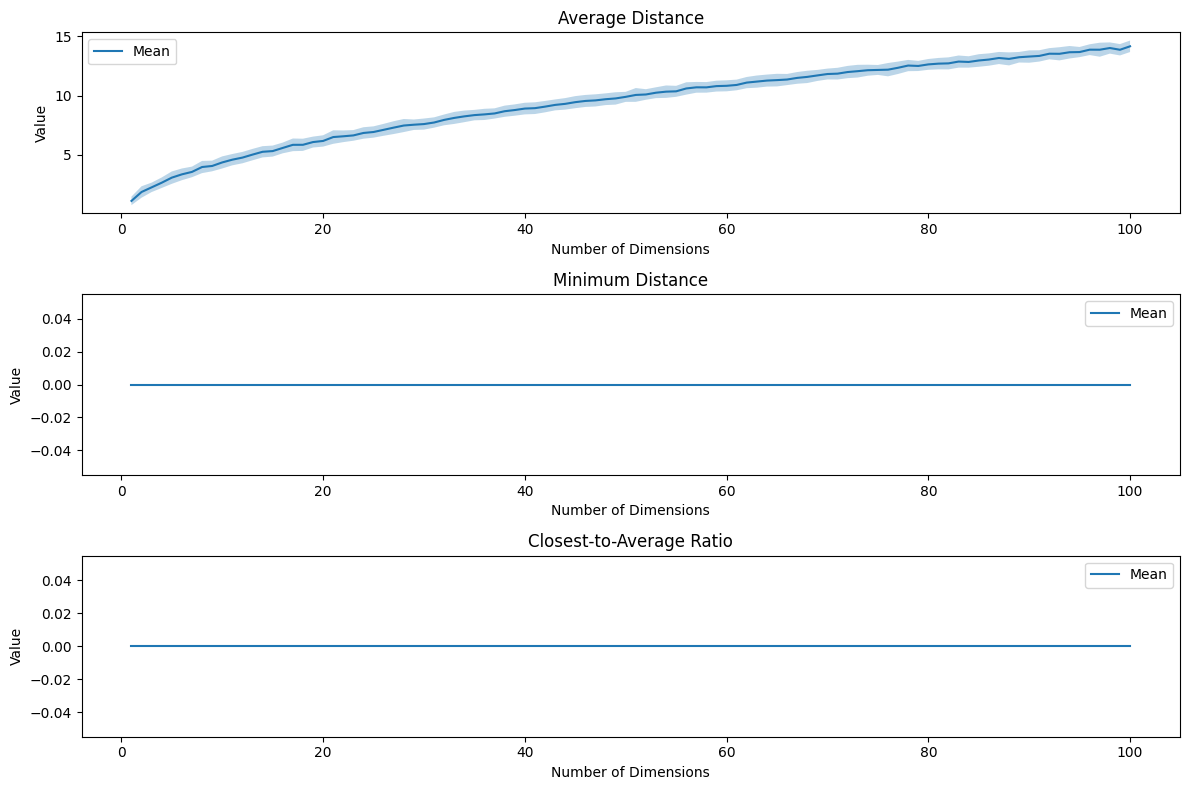

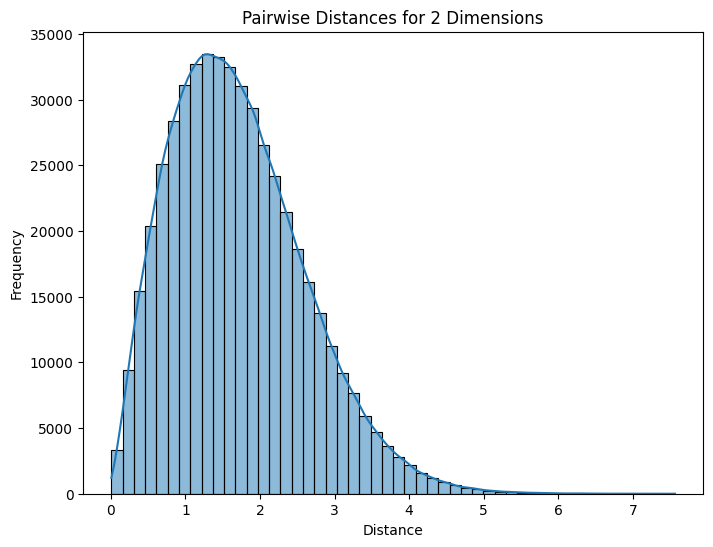

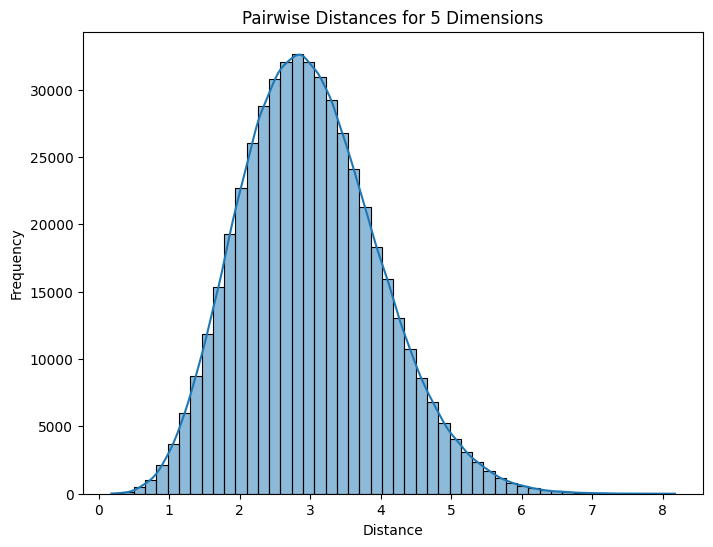

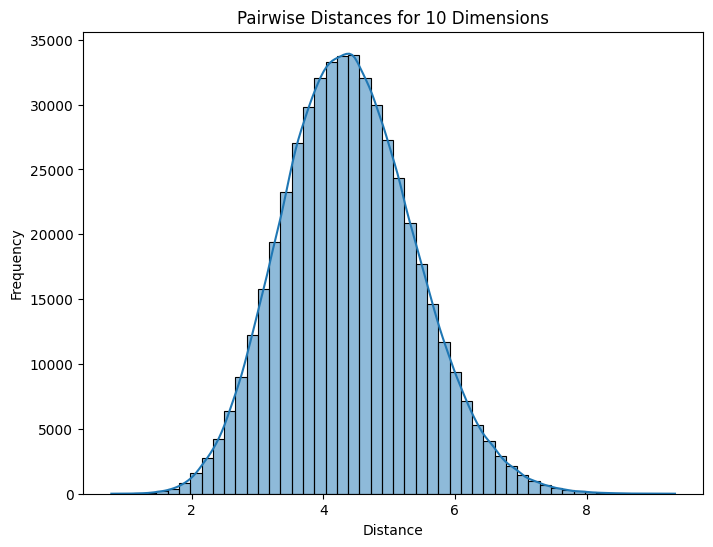

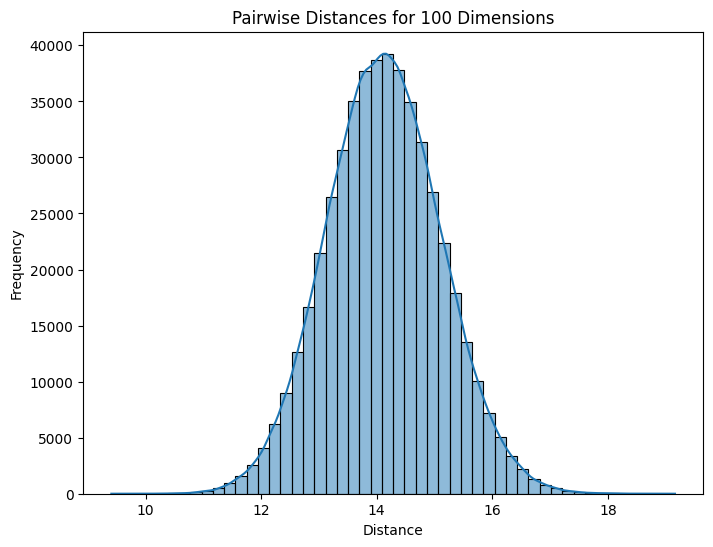

In [ ]:

# Experiment setup
num_dimensions_range = range(1, 101)
mean_values, std_values = experiment(num_dimensions_range)

# Plotting metrics
plot_metrics(num_dimensions_range, mean_values, std_values)

# Generating points for pairwise distance histogram
points_2d = random_points(1000, 2)
points_5d = random_points(1000, 5)
points_10d = random_points(1000, 10)
points_100d = random_points(1000, 100)

# Plotting pairwise distance histograms
plot_pairwise_distances(points_2d, 2)
plot_pairwise_distances(points_5d, 5)
plot_pairwise_distances(points_10d, 10)
plot_pairwise_distances(points_100d, 100)

# Average Distance vs. Number of Dimensions
A noteworthy trend is indicated by the plot of the average distance rising from 0 to 15 as the number of dimensions varies from 1 to 100. The average distance between points increases with increasing dimensionality. This phenomenon is frequently linked to the curse of dimensionality, which states that as data becomes more sparse in high-dimensional spaces, average point distances increase.

# Minimum Distance and Closest to Average Ratio
There always exists a pair of points with a minimum distance of zero, even as the dimensionality increases, according to the constant minimum distance plot (remaining at 0). The nature of the problem space or the method points are generated could be to blame for this. The closest to average ratio plot, which likewise remains constant at 0, indicates that the proportion of points that are closest to the average does not change much as dimensionality rises.

# Pairwise Distance Histograms
For varying dimensionalities, the pairwise distance histograms show distinct patterns:

The histogram displays a normal distribution in two dimensions, with a symmetrical spread and a center at 0.
The distribution starts to slightly skew to the right as the dimensionality rises to 5 and 10, but the histograms still depict a roughly normal distribution.
Compared to lower dimensions, the distribution in the case of 100 dimensions is noticeably more skewed towards the right, indicating that the distances between points tend to be larger and less concentrated around 0.

# Final Interparation
1-)The average distance between points increases with dimensionality, indicating that data in high-dimensional spaces is sparser.

2-)There are always point pairs with a minimum distance of 0, indicating specific patterns or structures within the data, even when the average distance increases.

3-)As dimensionality rises, the distribution of pairwise distances tends to skew more toward larger distances, underscoring the difficulties in handling high-dimensional data and the divergence from lower-dimensional space intuition.

# 2.k-NN Classifier In Action

In [ ]:
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

# Reshape the data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [ ]:
# Define values of k to experiment with
k_values = [1,3,7,12,20, 30, 50, 75, 100]

# Train and evaluate k-NN classifier for different values of k
val_accuracies = []
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_val_pred = knn.predict(X_val_flat)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    print(f'Validation accuracy for k={k}: {val_accuracy:.4f}')

Validation accuracy for k=1: 0.8487
Validation accuracy for k=3: 0.8524
Validation accuracy for k=7: 0.8539
Validation accuracy for k=12: 0.8482
Validation accuracy for k=20: 0.8427
Validation accuracy for k=30: 0.8346
Validation accuracy for k=50: 0.8243
Validation accuracy for k=75: 0.8159
Validation accuracy for k=100: 0.8083


In [ ]:
# Select the optimal value of k
optimal_k = k_values[np.argmax(val_accuracies)]
print(f'Optimal value of k: {optimal_k}')

Optimal value of k: 7


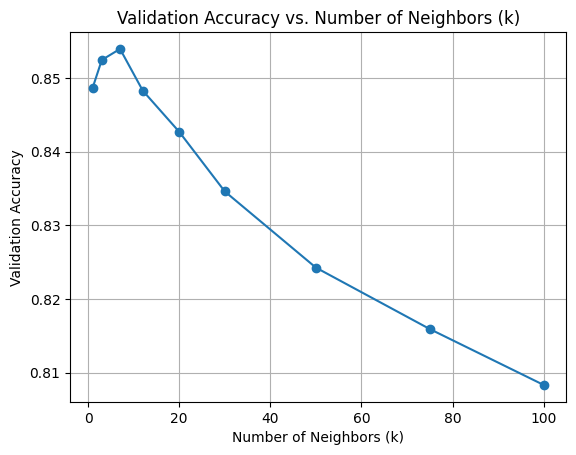

In [ ]:
# Plot validation accuracy vs. k
plt.plot(k_values, val_accuracies, marker='o')
plt.title('Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Combine training and validation sets
X_train_combined = np.concatenate((X_train_flat, X_val_flat))
y_train_combined = np.concatenate((y_train, y_val))

# Retrain k-NN classifier with optimal k
knn_optimal = KNN(n_neighbors=optimal_k)
knn_optimal.fit(X_train_combined, y_train_combined)

# Evaluate performance on test set
y_test_pred = knn_optimal.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.4f}')


Test accuracy: 0.8540


In [ ]:
# Evaluate test accuracy
y_test_pred = knn_optimal.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy with optimal k={optimal_k}: {test_accuracy:.4f}')

Test accuracy with optimal k=7: 0.8540


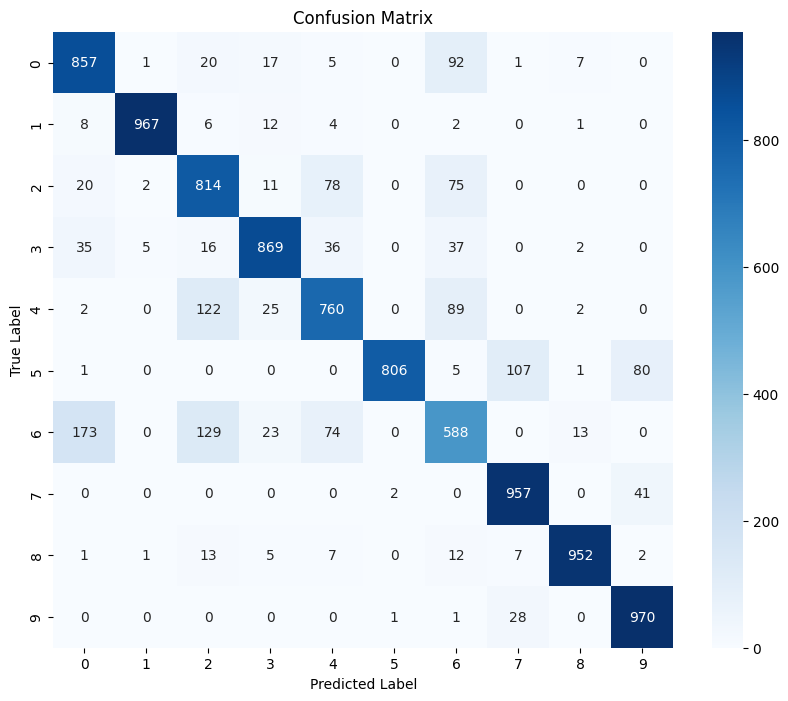

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Diagonal Elements (True Positives):** The diagonal elements of the confusion matrix represent the number of correctly classified instances for each class. Higher values along the diagonal indicate better performance for those classes. Classes with a darker shade along the diagonal have higher accuracy.

**Off-Diagonal Elements (Misclassifications):** Off-diagonal elements represent misclassifications. The darker the shade, the higher the number of misclassifications. Classes with brighter off-diagonal elements indicate fewer misclassifications.


**Highly Misclassified Classes:** Predicted as labels 0, 2, and 4, the true label 6 is: Class 6 is often mislabeled as classes 0, 2, and 4, suggesting that there may be confusion about class 6 and these classes. Predicted as label 6 are the true labels 0, 2, and 4. On the other hand, classes 0, 2, and 4 are frequently incorrectly assigned to class 6, highlighting the ambiguity surrounding these classes and class 6. In conclusion, class 6 and classes 0, 2, and 4 exhibit a significant degree of confusion, indicating feature similarities that result in incorrect classifications.

